<a href="https://colab.research.google.com/github/enzmiguel/predicao-notas-alunos-eua/blob/main/projeto_predicao_notas_estudantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Machine Learning: Previsão de notas de estudantes dos EUA

## README

O projeto visa prever, através de 5 modelos diferentes de machine learning, as notas de estudantes do "ensino médio" dos EUA. São utilizados alguns indicadores para basear a previsão. São eles: Quantidade de faltas, a série atual, apoio dos pais, tempo de estudo semanal e se participa de monitoria.
Com base nesses fatores, o objetivo da IA é: a partir do fornecimento dessas informações acima, prever a nota de um aluno.


### Detalhes sobre o conjunto de dados:

**Tamanho:** O conjunto de dados possui 2392 linhas e 15 colunas.

**Descrição das Features:**

*   **StudentID:** ID do estudante (numérico).
*   **Gender:** Gênero do estudante (categórico).
*   **Age:** Idade do estudante (numérico).
*   **Ethnicity:** Etnia do estudante (categórico).
*   **ParentalEducation:** Nível de educação dos pais (categórico).
*   **Lunch:** Tipo de almoço do estudante (categórico).
*   **TestPreparation:** Se o estudante se preparou para o teste (categórico).
*   **Music:** Se o estudante gosta de música (categórico).
*   **Sports:** Se o estudante pratica esportes (categórico).
*   **Extracurricular:** Se o estudante participa de atividades extracurriculares (categórico).
*   **Volunteering:** Se o estudante faz trabalho voluntário (categórico).
*   **Absences:** Número de faltas do estudante (numérico).
*   **CurrentGrade:** Série atual do estudante (numérico).
*   **ParentalSupport:** Nível de apoio dos pais (categórico).
*   **StudyTimeWeekly:** Horas de estudo por semana (numérico).
*   **Tutoring:** Se o aluno participa de monitoria (categórico).
*   **GPA:** Nota média do estudante (numérico).

Fonte: https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset/data

## Importações básicas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importação dos dados e Análise Exploratória

In [ ]:
estudantes = pd.read_csv('Student_performance_data_.csv')
estudantes.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [ ]:
estudantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [ ]:
estudantes.shape

(2392, 15)

In [ ]:
estudantes.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [ ]:
#sns.pairplot(estudantes)

#plt.show()

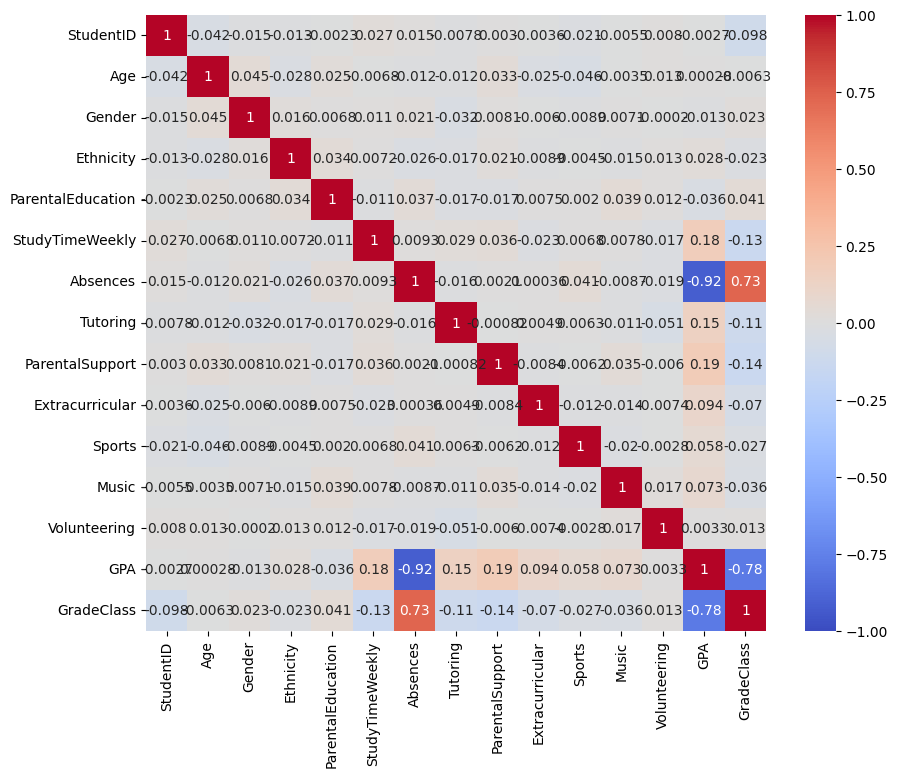

In [ ]:
correlacao = estudantes.corr()

plt.figure(figsize=(10,8))

sns.heatmap(correlacao, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.show()

In [ ]:
estudantes['Gender'].value_counts()

,count
Gender,
1,1222
0,1170


In [ ]:
estudantes.corr(numeric_only=True)['GPA'].sort_values(ascending=False)

,GPA
GPA,1.000000
ParentalSupport,0.190774
StudyTimeWeekly,0.179275
Tutoring,0.145119
Extracurricular,0.094078
Music,0.073318
Sports,0.057859
Ethnicity,0.027760
Volunteering,0.003258
Age,0.000275


## Limpeza e tratamento dos dados para ML

In [ ]:
estudantes_limpo = estudantes.drop(['StudentID', 'Age', 'Music', 'Ethnicity', 'Gender', 'Sports', 'Extracurricular', 'ParentalEducation', 'Volunteering'], axis=1)

In [ ]:
estudantes_limpo.head()

,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,GPA,GradeClass
0,19.833723,7,1,2,2.929196,2.0
1,15.408756,0,0,1,3.042915,1.0
2,4.210570,26,0,2,0.112602,4.0
3,10.028829,14,0,3,2.054218,3.0
4,4.672495,17,1,3,1.288061,4.0


## Separando dados de treino e dados de teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = estudantes_limpo['GPA']
x = estudantes_limpo.drop('GPA', axis=1)

In [ ]:
x.head()

,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,GradeClass
0,19.833723,7,1,2,2.0
1,15.408756,0,0,1,1.0
2,4.210570,26,0,2,4.0
3,10.028829,14,0,3,3.0
4,4.672495,17,1,3,4.0


In [ ]:
y.head()

,GPA
0,2.929196
1,3.042915
2,0.112602
3,2.054218
4,1.288061


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=41)

## Importação das bibliotecas de ML

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

## Treinando os modelos

### Regressão Linear

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
dados_avaliacao_linreg = x.iloc[:5]
dados_avaliacao_y_linreg = y.iloc[:5]

print(f'Predição: {lin_reg.predict(dados_avaliacao_linreg)}')
print(f'Real: {list(dados_avaliacao_y_linreg)}')

Predição: [3.08149464 3.313014   0.56492933 2.01395685 1.7455102 ]
Real: [2.929195591667681, 3.042914833436377, 0.1126022544661815, 2.0542181397029484, 1.2880611817953875]


In [ ]:
# Verificando desemprenho com os dados de treino

preds_lin = lin_reg.predict(x_train)
lin_mse = mean_squared_error(y_train, preds_lin)
lin_rmse = np.sqrt(lin_mse)
print(f'O modelo está errando em média {lin_rmse} pontos a cada predição.')

O modelo está errando em média 0.23211371802253708 pontos a cada predição.


In [ ]:
# Avaliação Cross-Validation em que divide o dataset em partes e faz a verificação de desemprenho em cada uma delas.


scores = cross_val_score(lin_reg, x_train, y_train, scoring='neg_mean_squared_error', cv=10)

tree_rmse_scores = np.sqrt(-scores)

def mostrar_avaliacoes(scores):
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('Standard Deviation: ', scores.std())

mostrar_avaliacoes(tree_rmse_scores)

Scores:  [0.22608075 0.21537269 0.23928688 0.23756007 0.23809914 0.23757945
 0.22010461 0.23720132 0.24182229 0.23464036]
Mean:  0.23277475488952942
Standard Deviation:  0.008543113570161352


In [ ]:
# Verificando o desempenho com os dados de teste

preds_lin = lin_reg.predict(x_test)
lin_mse = mean_squared_error(y_test, preds_lin)
lin_rmse = np.sqrt(lin_mse)
print(f'O modelo está errando em média {lin_rmse} pontos a cada predição.')

O modelo está errando em média 0.2250138080239925 pontos a cada predição.


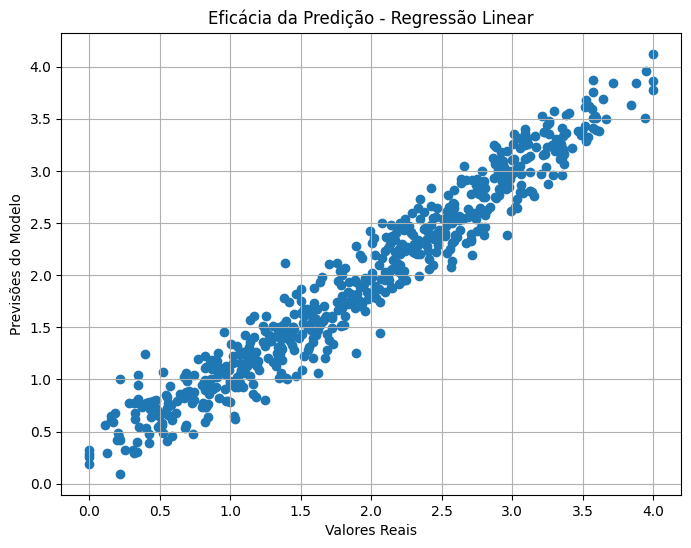

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, preds_lin)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões do Modelo')
plt.title('Eficácia da Predição - Regressão Linear')
plt.grid(True)
plt.show()

### Árvore de Decisão

In [ ]:
dec_tree = DecisionTreeRegressor()
dec_tree.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
dados_avaliacao_dectree = x.iloc[:5]
dados_avaliacao_y_dectree = y.iloc[:5]

print(f'Predição: {dec_tree.predict(dados_avaliacao_dectree)}')
print(f'Real: {list(dados_avaliacao_y_dectree)}')

Predição: [2.92919559 3.36958436 0.6729362  2.05421814 1.28806118]
Real: [2.929195591667681, 3.042914833436377, 0.1126022544661815, 2.0542181397029484, 1.2880611817953875]


In [ ]:
preds_dectree = dec_tree.predict(x_train)
dectree_mse = mean_squared_error(y_train, preds_dectree)
dectree_rmse = np.sqrt(dectree_mse)

print(f'O modelo está errando em média {dectree_rmse} pontos a cada predição.')

O modelo está errando em média 0.0 pontos a cada predição.


In [ ]:
# Avaliação Cross-Validation em que divide o dataset em partes e faz a verificação de desemprenho em cada uma delas.

from sklearn.model_selection import cross_val_score

scores = cross_val_score(dec_tree, x_train, y_train, scoring='neg_mean_squared_error', cv=10)

tree_rmse_scores = np.sqrt(-scores)

def mostrar_avaliacoes(scores):
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('Standard Deviation: ', scores.std())

mostrar_avaliacoes(tree_rmse_scores)

Scores:  [0.28676038 0.34454242 0.3348914  0.27323656 0.32483847 0.28854738
 0.30830362 0.27662254 0.30441868 0.30688398]
Mean:  0.30490454352418694
Standard Deviation:  0.022984653909708865


In [ ]:
# Predição usando os dados de teste
preds_dectree = dec_tree.predict(x_test)

dectree_mse = mean_squared_error(y_test, preds_dectree)
dectree_rmse = np.sqrt(dectree_mse)

print(f'O modelo está errando em média {dectree_rmse} pontos a cada predição nos dados de teste.')

O modelo está errando em média 0.3278296232446594 pontos a cada predição nos dados de teste.


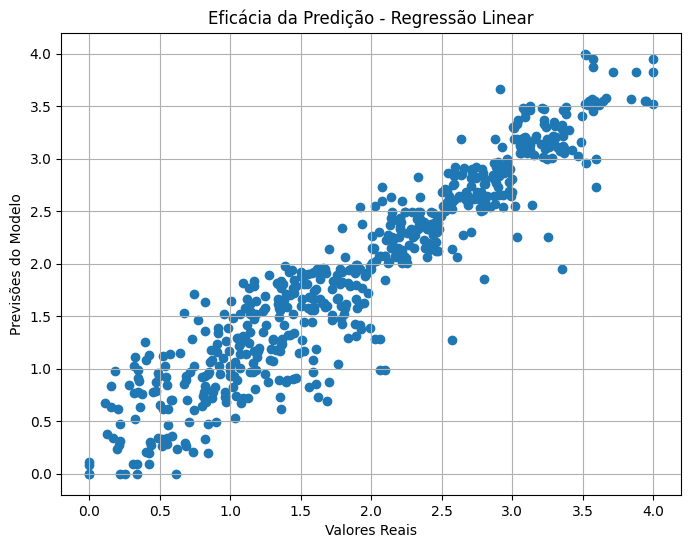

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, preds_dectree)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões do Modelo')
plt.title('Eficácia da Predição - Regressão Linear')
plt.grid(True)
plt.show()

### Floresta Aleatória

In [ ]:
r_forest = RandomForestRegressor()
r_forest.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
dados_avaliacao_rforest = x.iloc[:5]
dados_avaliacao_y_rforest = y.iloc[:5]

print(f'Predição: {r_forest.predict(dados_avaliacao_rforest)}')
print(f'Real: {list(dados_avaliacao_y_rforest)}')

Predição: [2.87016465 3.33665607 0.54625694 2.11436767 1.42855956]
Real: [2.929195591667681, 3.042914833436377, 0.1126022544661815, 2.0542181397029484, 1.2880611817953875]


In [ ]:
preds_rforest = r_forest.predict(x_train)

rforest_mse = mean_squared_error(y_train, preds_rforest)
rforest_rmse = np.sqrt(rforest_mse)

print(f'O modelo está errado em média {rforest_rmse} pontos a cada predição.')

O modelo está errado em média 0.09077598922442594 pontos a cada predição.


In [ ]:
# Avaliação Cross-Validation em que divide o dataset em partes e faz a verificação de desemprenho em cada uma delas.


scores = cross_val_score(r_forest, x_train, y_train, scoring='neg_mean_squared_error', cv=10)

tree_rmse_scores = np.sqrt(-scores)

def mostrar_avaliacoes(scores):
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('Standard Deviation: ', scores.std())

mostrar_avaliacoes(tree_rmse_scores)

Scores:  [0.2130359  0.2501459  0.24000656 0.22116415 0.24875351 0.22578062
 0.24536574 0.21964895 0.26946309 0.24411684]
Mean:  0.23774812612058263
Standard Deviation:  0.016555589901116233


In [ ]:
preds_rforest = r_forest.predict(x_test)

rforest_mse = mean_squared_error(y_test, preds_rforest)
rforest_rmse = np.sqrt(rforest_mse)

print(f'O modelo está errado em média {rforest_rmse} pontos a cada predição nos dados de teste.')

O modelo está errado em média 0.23694038194449296 pontos a cada predição nos dados de teste.


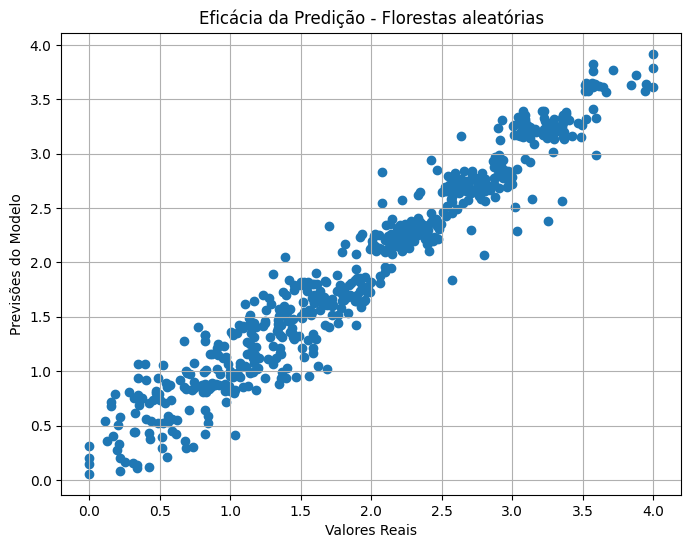

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, preds_rforest)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões do Modelo')
plt.title('Eficácia da Predição - Florestas aleatórias')
plt.grid(True)
plt.show()

### Support Vector Regression (SVR)

In [ ]:
svr = SVR()
svr.fit(x_train, y_train)

SVR()

In [ ]:
dados_avaliacao_svr = x.iloc[:5]
dados_avaliacao_y_svr = y.iloc[:5]

print(f'Predição: {list(svr.predict(dados_avaliacao_svr))}')
print(f'Real: {list(dados_avaliacao_y_svr)}')

Predição: [2.9485545079314743, 3.286895383383835, 0.4747887487665521, 2.0813709033858467, 1.7676952797102428]
Real: [2.929195591667681, 3.042914833436377, 0.1126022544661815, 2.0542181397029484, 1.2880611817953875]


In [ ]:
preds_svr = svr.predict(x_train)

svr_mse = mean_squared_error(y_train, preds_svr)
svr_rmse = np.sqrt(svr_mse)

print(f'O modelo está errando em média {svr_rmse} pontos a cada predição.')

O modelo está errando em média 0.22164858480211805 pontos a cada predição.


In [ ]:
# Avaliação Cross-Validation em que divide o dataset em partes e faz a verificação de desemprenho em cada uma delas.


scores = cross_val_score(svr, x_train, y_train, scoring='neg_mean_squared_error', cv=10)

tree_rmse_scores = np.sqrt(-scores)

def mostrar_avaliacoes(scores):
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('Standard Deviation: ', scores.std())

mostrar_avaliacoes(tree_rmse_scores)

Scores:  [0.20873979 0.20218824 0.22719986 0.2180417  0.21736194 0.22298321
 0.22329426 0.21669312 0.27689245 0.22835372]
Mean:  0.22417482734834476
Standard Deviation:  0.019156235890423028


In [ ]:
preds_svr = svr.predict(x_test)

svr_mse = mean_squared_error(y_test, preds_svr)
svr_rmse = np.sqrt(svr_mse)

print(f'O modelo está errando em média {svr_rmse} pontos a cada predição.')

O modelo está errando em média 0.21564890317035298 pontos a cada predição.


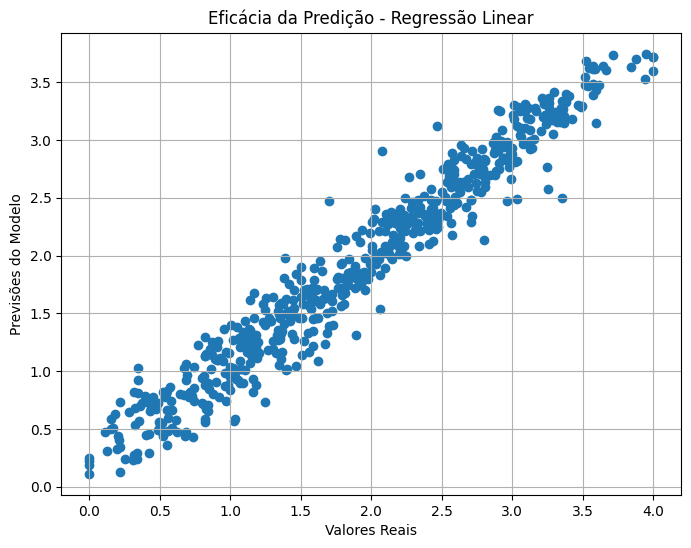

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, preds_svr)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões do Modelo')
plt.title('Eficácia da Predição - Regressão Linear')
plt.grid(True)
plt.show()

### K-Nearest Neighbors (KNN)

In [ ]:
knn = KNeighborsRegressor()

knn.fit(x_train, y_train)

KNeighborsRegressor()

In [ ]:
dados_avaliacao_knn = x.iloc[:5]
dados_avaliacao_y_knn = y.iloc[:5]

print(f'Predição: {list(knn.predict(dados_avaliacao_knn))}')
print(f'Real: {list(dados_avaliacao_y_knn)}')

Predição: [3.0339858806963287, 3.332097619212689, 0.657323805492972, 2.170392058269475, 1.569662807549626]
Real: [2.929195591667681, 3.042914833436377, 0.1126022544661815, 2.0542181397029484, 1.2880611817953875]


In [ ]:
preds_knn = knn.predict(x_train)

knn_mse = mean_squared_error(y_train, preds_knn)
knn_rmse = np.sqrt(knn_mse)

print(f'O modelo está errando em média {knn_rmse} pontos a cada predição.')

O modelo está errando em média 0.2090770333481637 pontos a cada predição.


In [ ]:
# Avaliação Cross-Validation em que divide o dataset em partes e faz a verificação de desemprenho em cada uma delas.


scores = cross_val_score(knn, x_train, y_train, scoring='neg_mean_squared_error', cv=10)

tree_rmse_scores = np.sqrt(-scores)

def mostrar_avaliacoes(scores):
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('Standard Deviation: ', scores.std())

mostrar_avaliacoes(tree_rmse_scores)

Scores:  [0.23922487 0.264967   0.25749809 0.25598511 0.26625675 0.2561922
 0.25480527 0.24681092 0.29676975 0.26425881]
Mean:  0.2602768767817264
Standard Deviation:  0.014500429138065957


In [ ]:
preds_knn = knn.predict(x_test)

knn_mse = mean_squared_error(y_test, preds_knn)
knn_rmse = np.sqrt(knn_mse)

print(f'O modelo está errando em média {knn_rmse} pontos a cada predição.')

O modelo está errando em média 0.2549420102801279 pontos a cada predição.


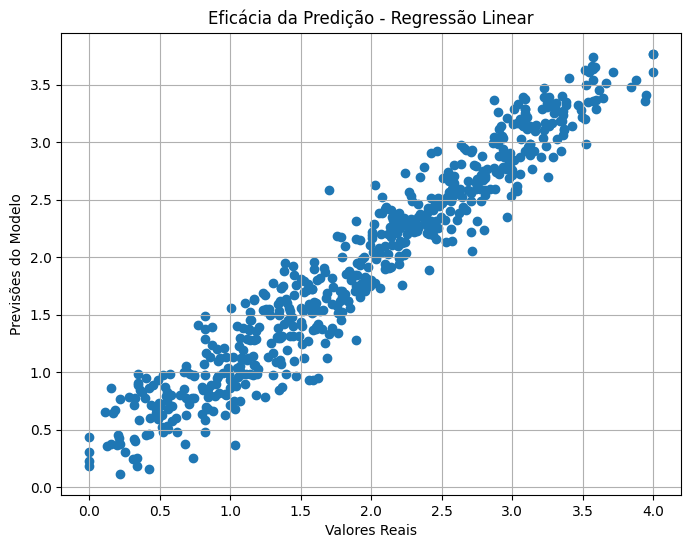

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, preds_knn)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões do Modelo')
plt.title('Eficácia da Predição - Regressão Linear')
plt.grid(True)
plt.show()

## Avaliando o melhor modelo